<a href="https://colab.research.google.com/github/abdulloshoh/DataScience_mohirdev/blob/master/Deep_learning_Birinchi_modelimizni_quramiz_(rasm_klassifikatsiyasi)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.cuda.is_available() # for checking the GPU working or not

True

In [ ]:
import fastai
print(fastai.__version__)
print(torch.__version__)

2.7.13
2.1.0+cu118


In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets # yasalgan modelni test qilsih uchun

# Data
path = untar_data(URLs.PETS)/'images' # datani zip filedan ozod qildik

# labellovchi function
def is_cat(x):return x[0].isupper() # if 1-data upper bo`lmasa false qaytaradi

# datani yuklovchi (dataloader)

dls = ImageDataLoaders().from_name_func(
    path,get_image_files(path),valid=0.2 , seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# Train

learn = cnn_learner(dls,resnet34, metrics=accuracy)
learn.fine_tune(2)



/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 62.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.167432,0.025382,0.993911,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.057397,0.020316,0.995940,00:49
1,0.029811,0.019123,0.995940,00:49


# Modelni check qilish

In [ ]:
from ipywidgets.widgets.widget_upload import FileUpload
# rasm yuklash uchun widget

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

is it cat ?  {'True'}
probability: 0.9999967813491821


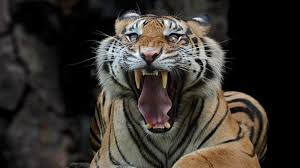

In [ ]:
img = PILImage.create(upload.data[-1]) # rasm
pred,__,prob = learn.predict(img) # predict
print(f'is it cat ? ', {pred})
print(f'probability: {prob[1].item():3}')
img